# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to the environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        #print('\nThe state for the first agent looks like:\n', states[0]/30)
        #print('The state for the second agent looks like:\n', states[1]/30)
        #input()
        if np.any(dones):                                  # exit loop if episode finished
            print("Episode over")
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Episode over
Score (max over agents) from episode 1: 0.09000000171363354
Episode over
Score (max over agents) from episode 2: 0.0
Episode over
Score (max over agents) from episode 3: 0.0
Episode over
Score (max over agents) from episode 4: 0.0
Episode over
Score (max over agents) from episode 5: 0.0


### 4. Import the necessary packages

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 5. Instantiate the Agent

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

### 6. Train the Agent with DDPG

Episode 100	Average Score: 0.0087
Episode 200	Average Score: 0.0030
Episode 300	Average Score: 0.0020
Episode 400	Average Score: 0.0000
Episode 500	Average Score: 0.0000
Episode 600	Average Score: 0.0000
Episode 700	Average Score: 0.0000
Episode 800	Average Score: 0.0000
Episode 900	Average Score: 0.0000
Episode 1000	Average Score: 0.0000
Episode 1100	Average Score: 0.0147
Episode 1200	Average Score: 0.0000
Episode 1300	Average Score: 0.0000
Episode 1400	Average Score: 0.0000
Episode 1500	Average Score: 0.0000
Episode 1600	Average Score: 0.0000
Episode 1700	Average Score: 0.0000
Episode 1800	Average Score: 0.0000
Episode 1900	Average Score: 0.0000
Episode 2000	Average Score: 0.0000
Episode 2100	Average Score: 0.0000
Episode 2200	Average Score: 0.0038
Episode 2300	Average Score: 0.0040
Episode 2400	Average Score: 0.0110
Episode 2500	Average Score: 0.0077
Episode 2600	Average Score: 0.0066
Episode 2700	Average Score: 0.0048
Episode 2800	Average Score: 0.0066
Episode 2900	Average Score: 0

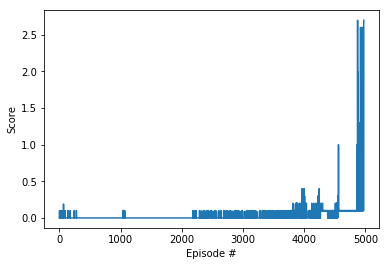

In [8]:
def ddpg(n_episodes=10000, max_t=3000, print_every=100):
    noise_scale = 1.0
    noise_decay = 0.995
    max_scores_deque = deque(maxlen=100)
    max_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations / 30
        episode_scores = np.zeros(num_agents)
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states, noise_scale)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations / 30
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards * 10, next_states, dones)
            states = next_states
            episode_scores += rewards
            if np.any(dones):
                break
        noise_scale *= noise_decay
                
        max_score = np.max(episode_scores)
        max_scores.append(max_score)
        max_scores_deque.append(max_score)        
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(max_scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(max_scores_deque)))
        if np.mean(max_scores_deque) > 0.5 and i_episode > 100:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {} episodes!'.format(i_episode))
            break
            
    return max_scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Watch the trained agent

In [9]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations / 30
agent.reset()
for t in range(300):
    actions = agent.act(states, 0.0)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations / 30
    rewards = env_info.rewards
    dones = env_info.local_done
    agent.step(states, actions, rewards * 10, next_states, dones)
    states = next_states
    if np.any(dones):
        break

### 8. Close the environment

In [10]:
env.close()